In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


C:\Users\vs682\AppData\Local\Temp\ipykernel_1692\957223989.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


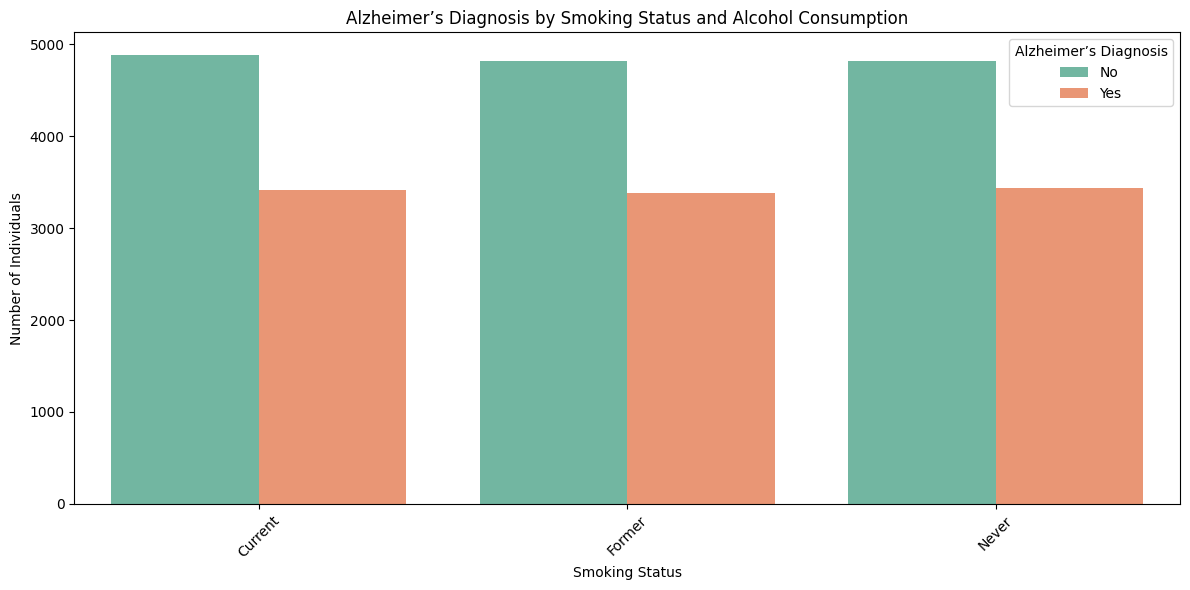

In [ ]:
# Grouped bar chart

# Group data by Smoking Status, Alcohol Consumption, and Alzheimer’s Diagnosis
grouped_data = df.groupby(['Smoking Status', 'Alcohol Consumption', 'Alzheimer’s Diagnosis']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x='Smoking Status',
    y='Count',
    hue='Alzheimer’s Diagnosis',
    palette='Set2',
    ci=None
)
plt.title('Alzheimer’s Diagnosis by Smoking Status and Alcohol Consumption')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Individuals')
plt.legend(title='Alzheimer’s Diagnosis', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vs682\AppData\Local\Temp\ipykernel_1692\3913556591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


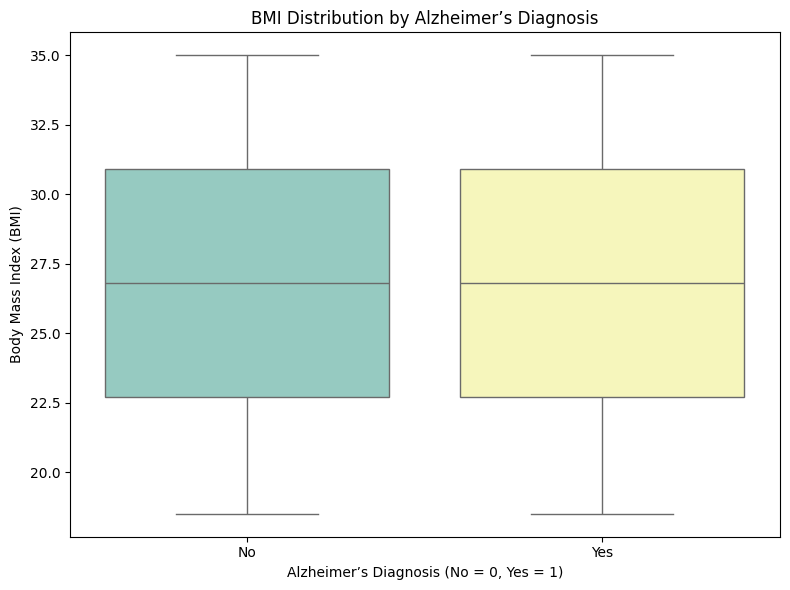

In [12]:
# box plot

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Alzheimer’s Diagnosis',
    y='BMI',
    palette='Set3'
)

# Customize plot
plt.title('BMI Distribution by Alzheimer’s Diagnosis')
plt.xlabel('Alzheimer’s Diagnosis (No = 0, Yes = 1)')
plt.ylabel('Body Mass Index (BMI)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

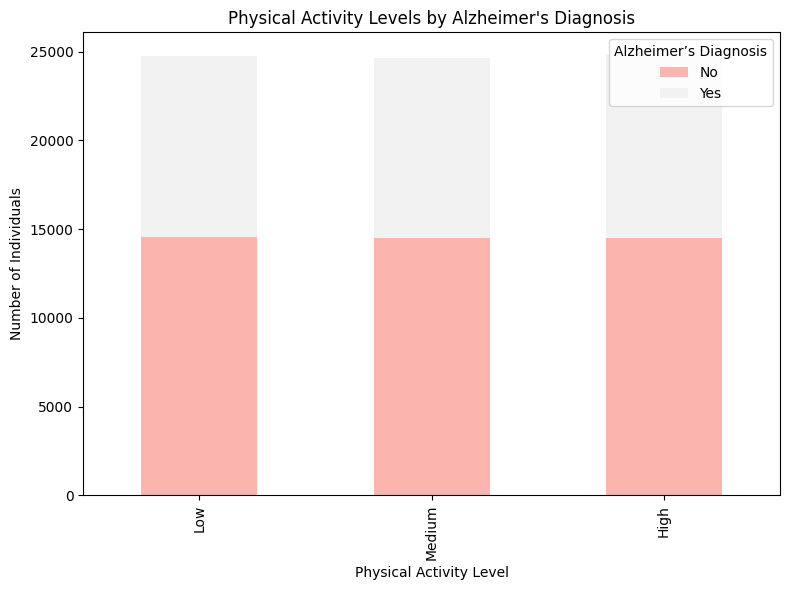

In [19]:
# stacked bar

# Creating cross-tab of Physical Activity Level and Diagnosis
activity_ct = pd.crosstab(df['Physical Activity Level'], df['Alzheimer’s Diagnosis'])

# Sorting index if needed
activity_ct = activity_ct.reindex(['Low', 'Medium', 'High'])  # Adjust order if you want specific order

# Plotting stacked bar chart
activity_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    colormap='Pastel1'
)

# Customi chart
plt.title("Physical Activity Levels by Alzheimer's Diagnosis")
plt.xlabel("Physical Activity Level")
plt.ylabel("Number of Individuals")
plt.legend(title="Alzheimer’s Diagnosis", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


In [ ]:
# bar plot

plt.bar_label